In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df = pd.read_csv('iris.csv')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
class  Model(nn.Module):
    def __init__(self,in_features=4, h1=8,h2=9,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [4]:
X = df.drop('target', axis=1).values

In [5]:
y = df['target'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [7]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [8]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [9]:
torch.manual_seed(3)
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [10]:
epochs = 100
loss_list = []

for epoch in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion (y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_list.append(loss)
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1} loss:{loss.item(): .4f}')

epoch: 10 loss: 0.8756
epoch: 20 loss: 0.6792
epoch: 30 loss: 0.5355
epoch: 40 loss: 0.4407
epoch: 50 loss: 0.3578
epoch: 60 loss: 0.2334
epoch: 70 loss: 0.1251
epoch: 80 loss: 0.0714
epoch: 90 loss: 0.0513
epoch: 100 loss: 0.0433


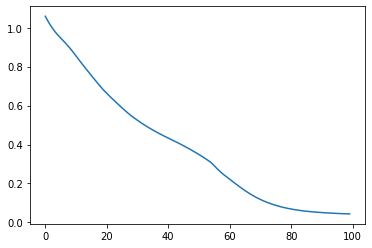

In [11]:
plt.plot(loss_list)

In [15]:
with torch.no_grad():
    predicted_y = model.forward(X_test)
    loss = criterion(predicted_y, y_test)
print(loss.item())

0.09690602868795395


In [16]:
torch.save(model.state_dict(),'IrisClassificationModel.pt')

In [17]:
model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [18]:
new_iris = torch.tensor([5.6,3.7,2.1,0.7])

with torch.no_grad():
    print(model(new_iris))
    print(model(new_iris).argmax())

tensor([  5.1017,   0.7615, -10.8838])
tensor(0)


In [19]:
new_model = Model()
new_model.load_state_dict(torch.load('IrisClassificationModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [20]:
with torch.no_grad():
    print(model(new_iris))
    print(model(new_iris).argmax())

tensor([  5.1017,   0.7615, -10.8838])
tensor(0)
